# バビロニア数字に変換するための辞書を作る

## 粘土板に楔形文字を書く
* [Writing Cuneiform (video) | Khan Academy](https://www.khanacademy.org/humanities/ancient-art-civilizations/ancient-near-east1/the-ancient-near-east-an-introduction/v/cuneiform)

## 古代バビロニアの楔形文字による数字
* [Babylonian cuneiform numerals - Wikipedia](https://en.wikipedia.org/wiki/Babylonian_cuneiform_numerals)

* [Cuneiform (Unicode block) - Wikipedia](https://en.wikipedia.org/wiki/Cuneiform_%28Unicode_block%29)
* [Cuneiform Numbers and Punctuation - Wikipedia](https://en.wikipedia.org/wiki/Cuneiform_Numbers_and_Punctuation)
* [List of cuneiform signs - Wikipedia](https://en.wikipedia.org/wiki/List_of_cuneiform_signs)

In [1]:
!pip install -U lxml

  Using cached lxml-5.2.2-cp311-cp311-manylinux_2_28_x86_64.whl.metadata (3.4 kB)
Using cached lxml-5.2.2-cp311-cp311-manylinux_2_28_x86_64.whl (5.0 MB)


In [2]:
import pandas as pd

In [3]:
dfs = pd.read_html('https://en.wikipedia.org/wiki/Cuneiform_Numbers_and_Punctuation')

In [4]:
dfs[2]

,Sign,Code point,Name,Borger (2003),Borger (1981),Comments
0,𒀸,U+12038,one AŠ,001,NaN,"1, from general Cuneiform_(Unicode_block) not ..."
1,𒐀,U+12400,two AŠ,002,2,"2, = U+1212C"
2,𒐁,U+12401,three AŠ,004,NaN,"3, EŠ6"
3,𒐂,U+12402,four AŠ,215,12442,"4, LIMMU2, LIMM2, TAB.TAB"
4,𒐃,U+12403,five AŠ,216,NaN,"5, IA7, TAB.TAB.AŠ"
...,...,...,...,...,...,...
99,𒑢,U+12462,Old Assyrian one quarter,NaN,NaN,NaN
100,𒑰,U+12470,Old Assyrian word divider,NaN,NaN,NaN
101,𒑱,U+12471,vertical colon,592,NaN,Glossenkeil
102,𒑲,U+12472,diagonal colon,592,NaN,Glossenkeil


In [21]:
dfs[2].loc[22:30]

,Sign,Code point,Name,Borger (2003),Borger (1981),Comments
22,𒐕,U+12415,one GEŠ2,NaN,NaN,NaN
23,𒐖,U+12416,two GEŠ2,NaN,NaN,NaN
24,𒐗,U+12417,three GEŠ2,NaN,NaN,NaN
25,𒐘,U+12418,four GEŠ2,NaN,NaN,NaN
26,𒐙,U+12419,five GEŠ2,NaN,NaN,NaN
27,𒐚,U+1241A,six GEŠ2,NaN,NaN,NaN
28,𒐛,U+1241B,seven GEŠ2,NaN,NaN,NaN
29,𒐜,U+1241C,eight GEŠ2,NaN,NaN,NaN
30,𒐝,U+1241D,nine GEŠ2,NaN,NaN,NaN


In [6]:
U'\U00012415'

'𒐕'

In [59]:
for i in range(1, 10):
    print(i, chr(ord('\U00012415')-1+i))

1 𒐕
2 𒐖
3 𒐗
4 𒐘
5 𒐙
6 𒐚
7 𒐛
8 𒐜
9 𒐝


In [55]:
u'\U0001230B'

'𒌋'

In [47]:
u'\U00012399'

'𒎙'

In [54]:
u'\U0001230D'

'𒌍'

In [57]:
u'\U0001240F'

'𒐏'

In [58]:
u'\U00012410'

'𒐐'

## 60進法の各桁の記号を表現するための辞書を作る

In [6]:
babylonian_numerals = {}
for i in range(1, 10):
    print(i, chr(ord('\U00012415')-1+i))
    babylonian_numerals[i] = chr(ord('\U00012415')-1+i)
babylonian_numerals

1 𒐕
2 𒐖
3 𒐗
4 𒐘
5 𒐙
6 𒐚
7 𒐛
8 𒐜
9 𒐝


{1: '𒐕', 2: '𒐖', 3: '𒐗', 4: '𒐘', 5: '𒐙', 6: '𒐚', 7: '𒐛', 8: '𒐜', 9: '𒐝'}

In [7]:
babylonian_numerals[10] = u'\U0001230B'
babylonian_numerals[20] = u'\U00012399'
babylonian_numerals[30] = u'\U0001230D'
babylonian_numerals[40] = u'\U0001240F'
babylonian_numerals[50] = u'\U00012410'

In [8]:
babylonian_numerals

{1: '𒐕',
 2: '𒐖',
 3: '𒐗',
 4: '𒐘',
 5: '𒐙',
 6: '𒐚',
 7: '𒐛',
 8: '𒐜',
 9: '𒐝',
 10: '𒌋',
 20: '𒎙',
 30: '𒌍',
 40: '𒐏',
 50: '𒐐'}

In [9]:
def decimal_to_babylonian(num):
    result = ''
    for value in sorted(babylonian_numerals.keys(), reverse=True):
        while num >= value:
            result += babylonian_numerals[value]
            num -= value
    return result

In [10]:
decimal_to_babylonian(33)

'𒌍𒐗'

## 60進数の位取り記法

In [1]:
%%ai vioras
pythonで10進数の実数を位取り記法の60進数に変換する。戻り値は0から59までの整数のリストで返す

Pythonで10進数の実数を60進数に変換する関数を作成することができます。以下はその一例です：

```python
def decimal_to_base60(decimal):
    base60 = []
    while decimal > 0:
        decimal, remainder = divmod(decimal, 60)
        base60.append(int(remainder))
    return base60[::-1]
```

この関数は10進数（`decimal`）を引数に取り、その数値を60進数に変換します。`divmod`関数を使って10進数を60で除した商と余りを求め、余りを60進数の桁の値とします。この手順を10進数が0になるまで繰り返します。

最後に得られたリストは最下位の桁から始まるので、リストを反転（`[::-1]`）して最上位の桁から始まるようにします。

ただし、上記の関数は整数のみを変換できます。実数（浮動小数点数）を変換するには、整数部分と小数部分を分けて考える必要があります。

小数部分を60進数に変換するには、小数部分を60倍して新たな整数部分と小数部分を得るという手順を繰り返すことで求めることができます。ただし、一般的には無限に続く小数部分を持つことがあるため、ある程度の精度まで求めたら計算を終了するか、あるいはあらかじめ変換する桁数を決めておくなどの工夫が必要です。

In [2]:
%%ai vioras
整数部分と小数部分を処理してください

了解しました。以下に、実数の整数部分と小数部分を60進数に変換するPython関数を作成します。小数部分の精度はあらかじめ設定できるようにします。

```python
def decimal_to_base60(decimal, precision=5):
    # 整数部分の変換
    integer_part = int(decimal)
    base60_integer_part = []
    while integer_part > 0:
        integer_part, remainder = divmod(integer_part, 60)
        base60_integer_part.append(int(remainder))
    base60_integer_part = base60_integer_part[::-1]

    # 小数部分の変換
    fractional_part = decimal - int(decimal)
    base60_fractional_part = []
    for _ in range(precision):
        fractional_part *= 60
        fractional_digit, fractional_part = divmod(fractional_part, 1)
        base60_fractional_part.append(int(fractional_digit))

    return base60_integer_part, base60_fractional_part
```

この関数は、整数部分と小数部分をそれぞれ60進数に変換しています。小数部分の変換は、小数部分を60倍して新たな整数部分（60進数の桁の値）と小数部分を得るという手順を繰り返します。この繰り返しは`precision`で指定した回数だけ行います。

例えば、`decimal_to_base60(1234.5678, 3)`を実行すると、10進数の1234.5678を60進数に変換した結果を返します。3は小数部分の精度（変換する桁数）を表しています。

In [3]:
def decimal_to_base60(decimal, precision=5):
    # 整数部分の変換
    integer_part = int(decimal)
    base60_integer_part = []
    while integer_part > 0:
        integer_part, remainder = divmod(integer_part, 60)
        base60_integer_part.append(int(remainder))
    base60_integer_part = base60_integer_part[::-1]

    # 小数部分の変換
    fractional_part = decimal - int(decimal)
    base60_fractional_part = []
    for _ in range(precision):
        fractional_part *= 60
        fractional_digit, fractional_part = divmod(fractional_part, 1)
        base60_fractional_part.append(int(fractional_digit))

    return base60_integer_part, base60_fractional_part

In [4]:
decimal_to_base60(12345)

([3, 25, 45], [0, 0, 0, 0, 0])

```{note}
古代バビロニアには$0$と小数点はないので、リストのリストをフラット化します
```

In [26]:
%%ai vioras
pythonで、リストのリストをフラット化する方法

Pythonでリストのリスト（二次元リスト）を一次元リストにフラット化する方法はいくつかあります。以下に、その一部を示します。

### 1. ループを使用する

もっとも基本的な方法は、ネストされたリストをループで処理することです：

```python
def flatten(nested_list):
    flat_list = []
    for sublist in nested_list:
        for item in sublist:
            flat_list.append(item)
    return flat_list
```

### 2. リスト内包表記を使用する

リスト内包表記を使用すると、上記のフラット化処理をより短く書くことができます：

```python
def flatten(nested_list):
    return [item for sublist in nested_list for item in sublist]
```

### 3. `itertools.chain`を使用する

`itertools`モジュールの`chain`関数を使用すると、ネストされたリストをフラット化することができます：

```python
from itertools import chain

def flatten(nested_list):
    return list(chain.from_iterable(nested_list))
```

`chain.from_iterable`はイテラブル（ここではリストのリスト）の各要素（ここではサブリスト）を連結します。

これらの方法はすべて、二次元リストを一次元リストにフラット化します。深くネストされたリスト（二次元以上）をフラット化するには、再帰的な処理が必要となります。

In [27]:
%%ai vioras
組み込み関数`sum`を使うこともできます

はい、その通りです。Pythonの組み込み関数`sum`を使って二次元リストをフラット化することも可能です。

`sum`関数は、通常、数値のリストを合計するために使用しますが、第2引数に空のリスト`[]`を指定すると、リストの連結を行うことができます。これを利用して、二次元リストをフラット化することができます。

```python
def flatten(nested_list):
    return sum(nested_list, [])
```

この関数は、`nested_list`の各サブリストを連結して一次元リストを作成します。

ただし、この方法はリストが大きい場合には非効率的です。`sum`関数はリストを連結するたびに新しいリストを作成するため、リストのサイズが大きいときには時間とメモリの両方でコストがかかります。そのため、大きなリストを扱う場合には、`itertools.chain`を使用する方法が推奨されます。

In [28]:
from itertools import chain
chain.from_iterable(decimal_to_base60(12345))

In [29]:
list(_)

[3, 25, 45, 0, 0, 0, 0, 0]

In [18]:
sum(decimal_to_base60(12345), [])

[3, 25, 45, 0, 0, 0, 0, 0]

In [19]:
list(map(decimal_to_babylonian, sum(decimal_to_base60(12345), [])))

['𒐗', '𒎙𒐙', '𒐏𒐙', '', '', '', '', '']

In [32]:
map?

Init signature: map(self, /, *args, **kwargs)
Docstring:     
map(func, *iterables) --> map object

Make an iterator that computes the function using arguments from
each of the iterables.  Stops when the shortest iterable is exhausted.
Type:           type
Subclasses:     

In [33]:
list?

Init signature: list(iterable=(), /)
Docstring:     
Built-in mutable sequence.

If no argument is given, the constructor creates a new empty list.
The argument must be an iterable if specified.
Type:           type
Subclasses:     _HashedSeq, StackSummary, _Threads, ConvertingList, DeferredConfigList, _ymd, SList, _ImmutableLineList, FormattedText, NodeList, ...

## 2の平方根

* [YBC 7289 - Wikipedia](https://en.wikipedia.org/wiki/YBC_7289)

In [34]:
%%ai vioras
YBC 7289について

YBC 7289（Yale Babylonian Collection 7289）は、バビロニアの数学者が紀元前1800年から1600年の間に作成した粘土板です。これは、最も古い既知の幾何学的図形を含んでおり、特に現代の数学におけるピタゴラスの定理に関連する図形が描かれています。

この粘土板には大まかに二つの部分があります。一つは正方形の図形で、その対角線の長さが正方形の辺の長さの約1.414213（現代の数学で√2として知られる値）であることが示されています。これは、バビロニア人が二次元の幾何学的関係を理解していたことを示しています。

もう一つの部分は、60進法（セクステージシマル）を基にした数値表記が描かれています。バビロニア人は、私たちが今日使用している10進法ではなく、60進法を使用していました。この60進法は現代でも時間の計測（例：1時間=60分、1分=60秒）や角度の表現（例：1度=60分、1分=60秒）に使われており、その影響を見ることができます。

YBC 7289の数値表記は、おそらく正方形の対角線の長さを計算するためのもので、それは正方形の一辺の長さの約1.414213倍となります。この数値は、60進法に基づいて記録されており、"1;24,51,10"という形式で表現されています。これは、1と24/60と51/3600と10/216000を合計したもので、これは約1.414213となります。

したがって、YBC 7289はバビロニア人が高度な数学的理解を持っていたことを示す重要な文化的・歴史的資料であり、特に幾何学と数値表記法の発展における彼らの貢献を示しています。

In [36]:
%%ai vioras
古代バビロニア人が2の平方根を求めた方法は？

バビロニア人が2の平方根を求めた方法は完全には分かっていませんが、彼らが使用していた数学的手法と、バビロニアの粘土板の一つであるYBC 7289から見つかった情報から推測することは可能です。

バビロニアの数学者たちは60進法を使用していました。YBC 7289の粘土板には、おそらく2の平方根の近似値と思われる数値が記録されています。この数値は "1;24,51,10" と表記されており、これを60進法で解釈すると約1.414213という値になります。これは2の平方根の現代的な近似値と非常によく一致しています。

具体的にどのようにしてこの近似値を求めたのかは不明ですが、彼らが利用していた可能性のある技術としては、二分法や牛頓法のような反復法、または連分数のような方法があります。これらの技術は、与えられた数の平方根の近似値を反復的に改善するために使用されます。

しかし、これらの方法が実際にバビロニアで使用されていたかどうかは確定的には言えません。これらの方法が現代の数学者によって発見されたものである可能性もあります。したがって、バビロニア人がどのようにして2の平方根を計算したのかは、まだ解明されていない歴史的な謎の一つと言えるでしょう。

In [20]:
sum(decimal_to_base60(1.41421356), [])

[1, 24, 51, 10, 7, 44]

In [21]:
list(map(decimal_to_babylonian, _))

['𒐕', '𒎙𒐘', '𒐐𒐕', '𒌋', '𒐛', '𒐏𒐘']

In [24]:
%%ai vioras
バビロニア法と言われている平開法について

バビロニア法（または平均解法、ヘロンの方法）は、平方根を求めるための古典的なアルゴリズムです。この方法は古代バビロニア人やギリシャの数学者ヘロンにより使われていました。

このアルゴリズムは反復的な手法で、初期推定値から始め、その値を徐々に改善していくことで求める値へと収束させます。

以下にその反復計算の手順を示します：

1. 初期推定値 $x_0$ を選びます（適当な正の値）。
2. 新しい推定値 $x_{n+1}$ を以下の式で計算します：

$$x_{n+1} = \frac{1}{2} \left( x_n + \frac{S}{x_n} \right)$$

ここで、$S$ は平方根を求めたい値です。

3. $x_{n+1}$ が十分に $S$ の平方根に近くなるまで、または一定の回数を超えるまでステップ2を繰り返します。

このアルゴリズムを用いて、与えられた数値 $S$ の平方根を求める Python の関数を以下に示します：

```python
def babylonian_method(S, x0, max_iterations=1000, tolerance=1e-6):
    x = x0
    for _ in range(max_iterations):
        x_new = 0.5 * (x + S / x)

        # 結果が十分に収束した（改善がない）場合、ループから抜け出します。
        if abs(x - x_new) < tolerance:
            break

        x = x_new
    return x
```

この関数は、平方根を求めたい数値 `S`、初期推定値 `x0`、最大反復回数 `max_iterations`（オプション）、許容誤差 `tolerance`（オプション）を引数に取り、求めた平方根の近似値を返します。反復は、新旧の推定値の差が許容誤差以下になると終了します。

In [36]:
import math

In [37]:
def babylonian_method(S, x0, max_iterations=1000, tolerance=1e-6):
    x = x0
    for _ in range(max_iterations):
        x_new = 0.5 * (x + S / x)
        print(x_new)

        # 結果が十分に収束した（改善がない）場合、ループから抜け出します。
        if abs(x - x_new) < tolerance:
            break

        x = x_new
    return x

In [38]:
babylonian_method(2, 2), math.sqrt(2)

1.5
1.4166666666666665
1.4142156862745097
1.4142135623746899
1.414213562373095


(1.4142135623746899, 1.4142135623730951)

In [25]:
%%ai vioras
バビロニア法とニュートン法の関係

バビロニア法（またはヘロンの方法）とニュートン法は、両者とも反復的な近似法を用いて数値解を求めるアルゴリズムであり、実は深い関係にあります。特にバビロニア法は、平方根を求める特殊なケースのニュートン法と考えることができます。

ニュートン法は一般的な非線形方程式の解を求めるための手法です。方程式 $f(x) = 0$ の解を求めるとき、初期推定値 $x_0$ から始めて以下の反復計算を行います：

$$x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}$$

ここで $f'(x_n)$ は $f(x)$ の $x_n$ における微分係数（導関数）です。

平方根 $\sqrt{S}$ を求める問題は、方程式 $x^2 - S = 0$ の解を求める問題と同じです。この方程式にニュートン法を適用すると、更新式は以下のようになります：

$$x_{n+1} = x_n - \frac{x_n^2 - S}{2x_n} = \frac{1}{2} \left( x_n + \frac{S}{x_n} \right)$$

これはまさしくバビロニア法の更新式と同じです。つまり、バビロニア法は平方根を求めるためのニュートン法と考えることができます。

### Pythagorean theorem and square root
* [How many ways are there to prove the Pythagorean theorem? - Betty Fei - YouTube](https://www.youtube.com/watch?v=YompsDlEdtc)

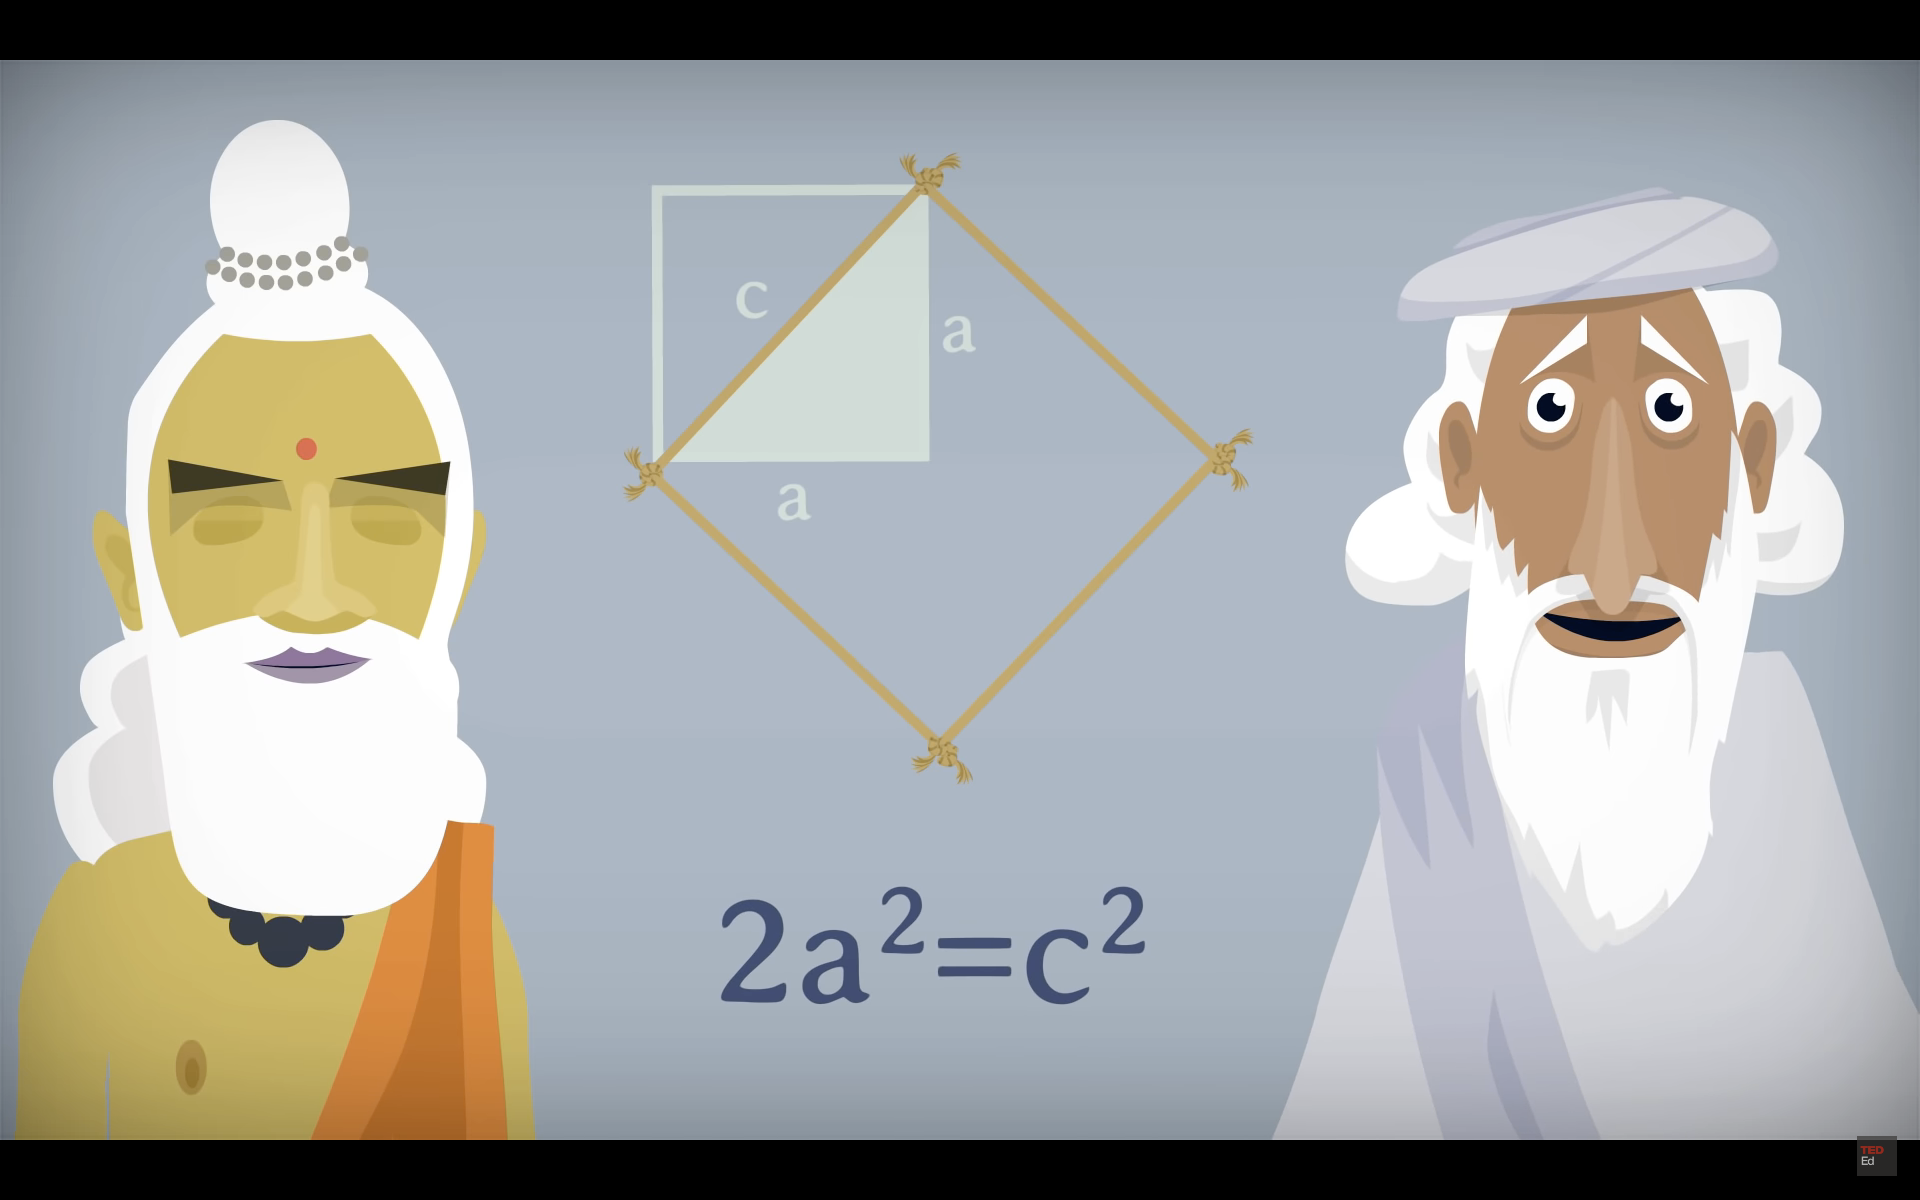

$a = \frac{1}{\sqrt{2}} \times c = \frac{\sqrt{2}}{2} \times c$

$2a = \frac{2}{\sqrt{2}} \times c = \sqrt{2} \times c$